# Descarga y preparación del entorno

## Instalación de dependencias

In [ ]:
! pip install -r requirements.txt   

## Descomprimir datos
En el repositorio se incluye un archivo comprimido con los datasets en formato `.csv` de los créditos presupuestarios utilizados en el trabajo.

Estos fueron descargados el 5/10/2024 de la página de [presupuesto abierto](https://www.presupuestoabierto.gob.ar/sici/datos-abiertos) del gobierno nacional argentino. Los archivos utilizados se encuentran en la página como "Presupuesto de gastos y su ejecución detallada - agrupación anual".

También se incluye un script de python para descargar todos los datasets de este tipo disponibles al momento (desde 1995 hasta 2024). Se puede encontrar en `utils/descarga-presupuestos.py`.

In [1]:
import zipfile
import os

# Cambiar al directorio "credito-anual"
os.chdir('data/presupuesto')

# Descomprimir el archivo "credito-anual.zip"
with zipfile.ZipFile('credito-anual.zip', 'r') as zip_ref:
    zip_ref.extractall()
    
os.chdir('../../')

print('Descomprimido credito-anual.zip')

Descomprimido credito-anual.zip


# Manejo de los datos con Pandas

## Carga de .csv a DataFrames de Pandas

In [2]:
import pandas as pd
DFs = {}
for year in range(2012,2020):
  df = pd.read_csv(f'data/presupuesto/credito-anual-{year}.csv', decimal=',')
  df.name = f'{year}'
  DFs[year] = df

## Funciones para el procesamiento de datos

In [3]:
def generar_dataframe_periodo(DFs, start_year, end_year):
        df = pd.concat([DFs[year] for year in range(start_year, end_year + 1)], ignore_index=True)
        df.name = f'{start_year}-{end_year}'
        return df

def calcular_total_pagado(df):
        return df['credito_pagado'].sum()

def calcular_total_pagado_por_funcion(df, funcion):
        return df[df['funcion_desc'].str.contains(funcion, na=False)]['credito_pagado'].sum()

def imprimir_resultados(df, total_pagado, total_pagado_trabajo, porcentaje):
        print(f'{df.name}:')
        print(f'    Total pagado: {total_pagado:,.2f}')
        print(f'    Total pagado con función \'Trabajo\': {total_pagado_trabajo:,.2f}')
        print(f'    Porcentaje pagado con función \'Trabajo\': {porcentaje}%')

## Calculo de inversión con función 'Trabajo' por períodos estudiados

In [4]:
periods = {}
porcentaje_por_periodo = {}
   
for period in ['2012-2015', '2016-2019', '2012-2019']:
        start_year, end_year = period.split('-')
        periods[period] = generar_dataframe_periodo(DFs, int(start_year), int(end_year))
        
        total_pagado = calcular_total_pagado(periods[period])
        total_pagado_trabajo = calcular_total_pagado_por_funcion(periods[period], 'Trabajo')
        porcentaje_por_periodo[period] = round((total_pagado_trabajo/total_pagado)*100,2)
        
        imprimir_resultados(periods[period], total_pagado , total_pagado_trabajo, porcentaje_por_periodo[period])

2012-2015:
    Total pagado: 3,673,561.01
    Total pagado con función 'Trabajo': 17,070.08
    Porcentaje pagado con función 'Trabajo': 0.46%
2016-2019:
    Total pagado: 12,317,476.66
    Total pagado con función 'Trabajo': 33,300.60
    Porcentaje pagado con función 'Trabajo': 0.27%
2012-2019:
    Total pagado: 15,991,037.68
    Total pagado con función 'Trabajo': 50,370.68
    Porcentaje pagado con función 'Trabajo': 0.31%


## Calculo de inversión con funcion 'Trabajo' por año

In [5]:
porcentaje_por_año = {}

for year in range(2012,2020):
    total_pagado = calcular_total_pagado(DFs[year])
    total_trabajo = calcular_total_pagado_por_funcion(DFs[year], 'Trabajo')
    porcentaje_por_año[year] = round((total_trabajo/total_pagado)*100,2)
    
    imprimir_resultados(DFs[year], total_pagado, total_trabajo, porcentaje_por_año[year])

2012:
    Total pagado: 531,870.32
    Total pagado con función 'Trabajo': 3,106.80
    Porcentaje pagado con función 'Trabajo': 0.58%
2013:
    Total pagado: 701,981.01
    Total pagado con función 'Trabajo': 3,507.28
    Porcentaje pagado con función 'Trabajo': 0.5%
2014:
    Total pagado: 1,081,679.25
    Total pagado con función 'Trabajo': 4,211.20
    Porcentaje pagado con función 'Trabajo': 0.39%
2015:
    Total pagado: 1,358,030.44
    Total pagado con función 'Trabajo': 6,244.80
    Porcentaje pagado con función 'Trabajo': 0.46%
2016:
    Total pagado: 2,054,865.50
    Total pagado con función 'Trabajo': 6,358.43
    Porcentaje pagado con función 'Trabajo': 0.31%
2017:
    Total pagado: 2,482,120.55
    Total pagado con función 'Trabajo': 9,735.44
    Porcentaje pagado con función 'Trabajo': 0.39%
2018:
    Total pagado: 3,193,254.13
    Total pagado con función 'Trabajo': 7,207.43
    Porcentaje pagado con función 'Trabajo': 0.23%
2019:
    Total pagado: 4,587,236.48
    Total

# Gráficos

## Crear carpeta para guardar los gráficos

In [6]:
import os
os.makedirs('plots', exist_ok=True)
os.makedirs('plots/presupuesto', exist_ok=True)

## Gráfico de pagos con función 'Trabajo' por año

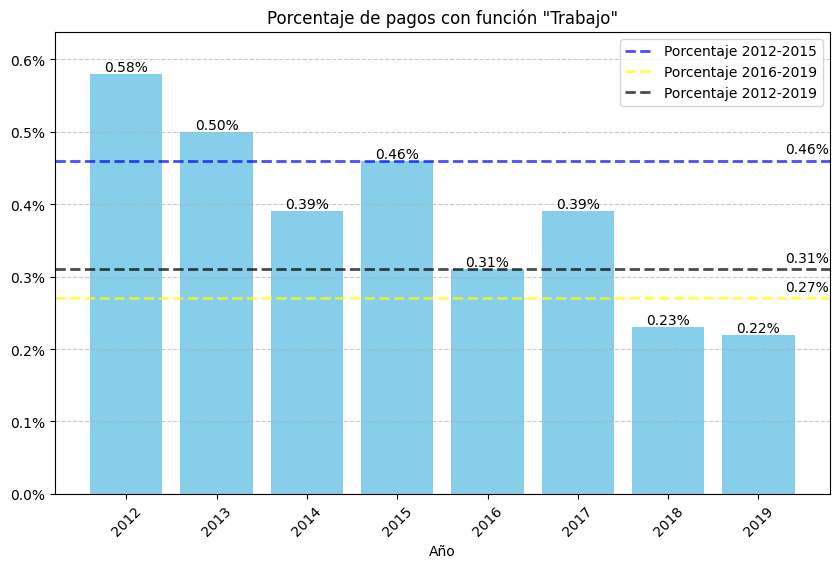

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

años = list(porcentaje_por_año.keys())
porcentajes = list(porcentaje_por_año.values())
periods = list(porcentaje_por_periodo.keys())
porcentajes_periodos = list(porcentaje_por_periodo.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(años, porcentajes, color='skyblue')
plt.xlabel('Año')
plt.title('Porcentaje de pagos con función "Trabajo"')
plt.xticks(años, rotation=45)
plt.ylim(0, max(porcentajes) * 1.1)  # Ajustar el límite del eje y para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatear el eje y como porcentaje
def percent_formatter(x, pos):
    return f'{x:.1f}%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Etiquetas en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Líneas punteadas para los periodos
colors = ['blue','yellow','black']
for i in range(len(periods)):
    plt.axhline(porcentajes_periodos[i], color=colors[i], linestyle='--', linewidth=2, label=f'Porcentaje {periods[i]}', alpha=0.7)
    plt.text(2019.3, porcentajes_periodos[i]+0.01, f'{porcentajes_periodos[i]}%')

plt.legend()

plt.savefig('plots/presupuesto/pagos_funcion_trabajo.png', bbox_inches='tight')

plt.show()